In [2]:
data_path = "X:\\Data\\ionSwitch\\"

# Ion switching data

Old [Kaggle competition](https://www.kaggle.com/c/liverpool-ion-switching/overview). Let's see how well we can do with a single feature

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

BATCH_SIZE = 500000
BATCH_NUM = 10

In [87]:
train = pd.read_csv(data_path+"train.csv")
test = pd.read_csv(data_path+"test.csv")
train.head()

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0


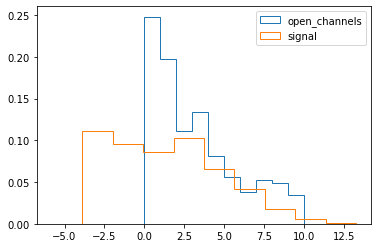

In [88]:
plt.hist(train.open_channels, bins=10, histtype='step', density=True, label="open_channels");
plt.hist(train.signal, bins=10, histtype='step', density=True, label="signal");
plt.legend();

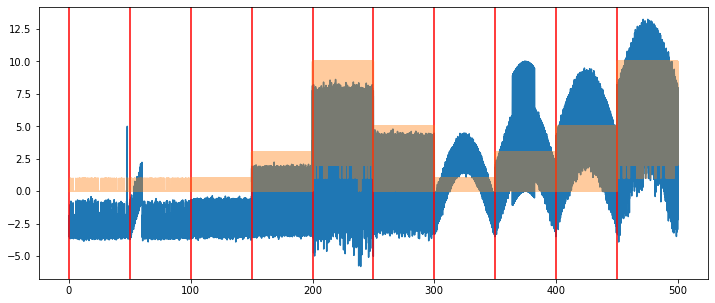

In [89]:
plt.figure(figsize=(12, 5))
plt.plot(train.time, train.signal);
for i in range(0,10):
    plt.axvline(train.time[:-1:BATCH_SIZE].values[i], color='r')
plt.plot(train.time, train.open_channels, alpha=0.4);

We are told (and the plots above illustrate) that the data is recorded in batches of 50 seconds and that the training set has 10 batches. We want to model the number of open ion channels. The synthetic experiment batches appear to have different maximum open ion channels. They also model the channel opening as Markov processes with different kernels. Some batches have artifical signal drift. The noise in the data is real.

Let us begin with the data without drift. These are batch indices `[0, 2, 3, 4, 5]`.

Batch 0 contains a spike at the batch boundary. This appears to be a massive outlier

In [90]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

def clean_batch(df):
    return df[remove_outliers(df)].dropna()

time             0
signal           0
open_channels    0
dtype: int64
               signal  open_channels
signal            1.0            NaN
open_channels     NaN            NaN
nan


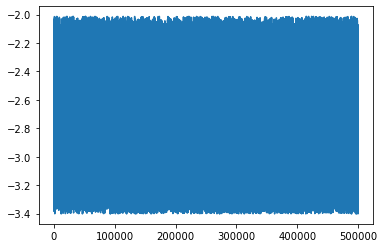

In [95]:
for i in [0]:
    batch = clean_batch(train[i*BATCH_SIZE:(i+1)*BATCH_SIZE])
    plt.figure()
    plt.plot(batch.signal)
    print(batch.isna().sum())
    print(batch[['signal','open_channels']].corr())
    print(batch.signal.corr(batch.open_channels))


<AxesSubplot:>

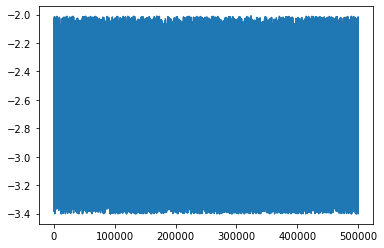

In [67]:
train[remove_outliers(train[0:BATCH_SIZE])].signal.plot()